In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np

#### Initialization

In [3]:
WEEKDAYS_IN_YEAR = 261
DAYS_IN_MONTH = 20

dl = DataLib("SignalData")
BondReturnIdx = dl.pull("BondRetIdx/LocalFX")
fxvsusd = dl.pull("fxVsUSD")
equities = dl.pull("EquityPrices")
m1 = dl.pull("M1/inUSD")
m2 = dl.pull("M2/inUSD")
m3 = dl.pull("M3/inUSD")
curr_acct_nom = dl.pull("CurrAcctNom/inUSD")
curr_acct_gdp = dl.pull("CurrAcctPctGDP")
LongRates = dl.pull("LongRates")
ShortRates = dl.pull("ShortRates")
fxNominal = dl.pull("fxTrdWts/Nominal")
fxReal = dl.pull("fxTrdWts/Real")
core_cpi = dl.pull("CoreCPI/SA")
gdp_real = dl.pull("GDP/Real")

## Question 3

#### Hedged Returns

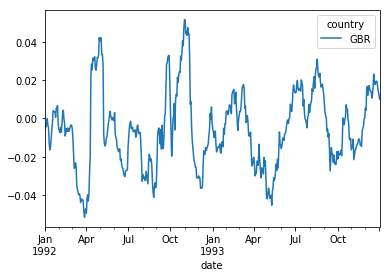

In [96]:
monthly_returns = BondReturnIdx.pct_change(DAYS_IN_MONTH)
monthly_returns_hedged = monthly_returns - 0.02 #price of hedge
monthly_returns_hedged.loc['1992-01':'1993-12',["GBR"]].plot()
plt.show()

#### Unhedged Returns

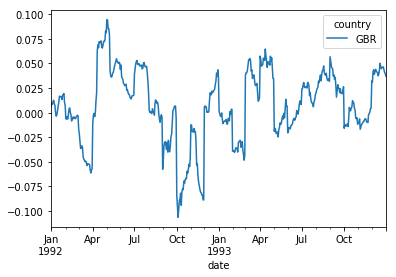

In [97]:
monthly_returns_unhedged = monthly_returns
monthly_change_fx = fxvsusd.pct_change(periods = 1)
for x in monthly_returns.index:
    change_fx = monthly_change_fx.loc[pd.Period(freq="M", year = x.year, month = x.month)].values
    ret = monthly_returns.loc[x]
    monthly_returns_unhedged.loc[x] = (1+ret) * (1+change_fx) - 1
monthly_returns_unhedged.loc['1992-01':'1993-12',["GBR"]].plot()
plt.show()

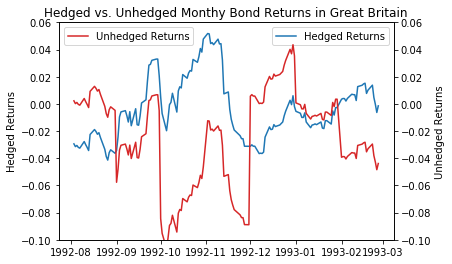

In [110]:
fig, ax1 = plt.subplots(sharey = True)
ax2 = ax1.twinx()
ax1.set_ylim([-.10,.06])
ax2.set_ylim([-.10,.06])
ax1_label = 'Hedged Returns'
ax1.plot(monthly_returns_hedged.loc['1992-08':'1993-02',["GBR"]].to_timestamp(), label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = 'Unhedged Returns'
ax2.plot(monthly_returns_unhedged.loc['1992-08':'1993-02',["GBR"]].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title("Hedged vs. Unhedged Monthy Bond Returns in Great Britain")
plt.show()

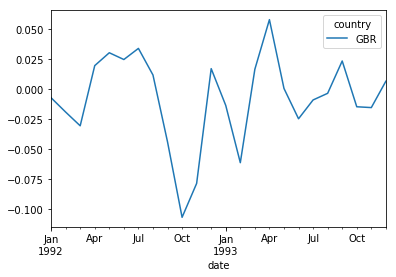

In [111]:
monthly_change_fx.loc['1992-01':'1993-12',["GBR"]].plot()
plt.show()

## Question 4

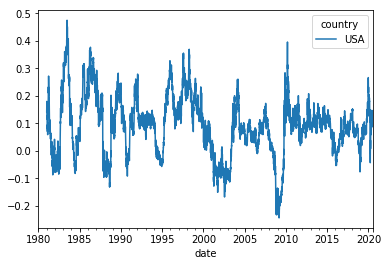

In [116]:
US_eq_annual_ret = equities.loc[:,["USA"]].pct_change(WEEKDAYS_IN_YEAR)
US_bond_annual_ret = BondReturnIdx.loc[:,["USA"]].pct_change(WEEKDAYS_IN_YEAR)
ret_60_40 = 0.60 * US_eq_annual_ret + 0.40 * US_bond_annual_ret
ret_60_40.plot()
plt.show()

#### Average Annual Return & Volatility

In [154]:
print("Average Annual Return")
ret_60_40.mean()

Average Annual Return


country
USA    0.091037
dtype: float64

In [156]:
print("Volatility")
ret_60_40.std()

Volatility


country
USA    0.106514
dtype: float64

#### Calculating Sharpe Ratio - US 60/40

In [117]:
sharpe_ratio = (ret_60_40 / ret_60_40.std()).mean()
sharpe_ratio

country
USA    0.854697
dtype: float64

#### Choosing Weights - Global Bonds

In [127]:
global_annual_ret = BondReturnIdx.pct_change(WEEKDAYS_IN_YEAR)
mean_returns = global_annual_ret.mean()
weights = mean_returns / sum(mean_returns)
weights

country
AUS    0.123122
DEU    0.089166
CAN    0.100573
ESP    0.119227
FRA    0.102876
ITA    0.118444
JPN    0.057813
CHE    0.064556
GBR    0.122982
USA    0.101241
dtype: float64

#### Sharpe Ratio - Global Bonds Portfolio

In [150]:
global_bonds_portfolio = (global_annual_ret * weights).sum(axis = 1).to_frame()
(global_bonds_portfolio / global_bonds_portfolio.std()).mean()

0    1.163965
dtype: float64

## Question 6

#### Short Rates vs. Current Account

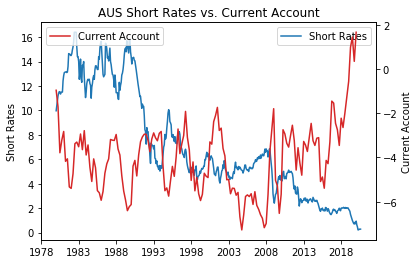

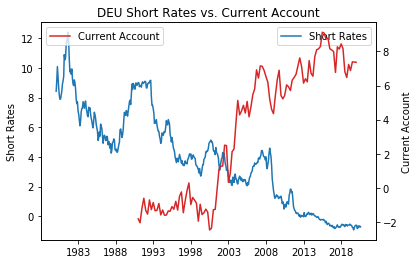

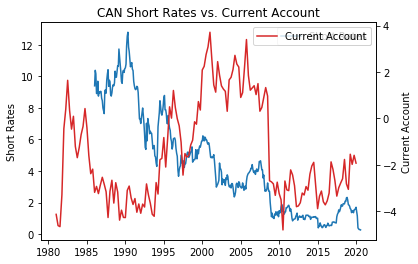

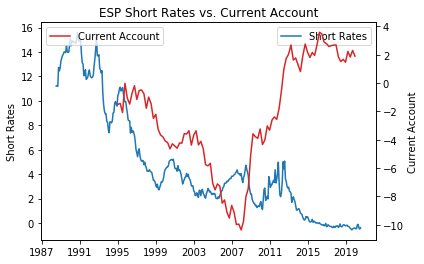

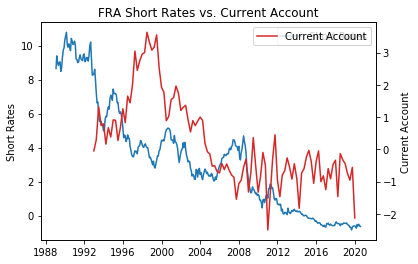

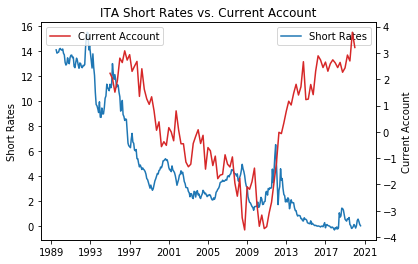

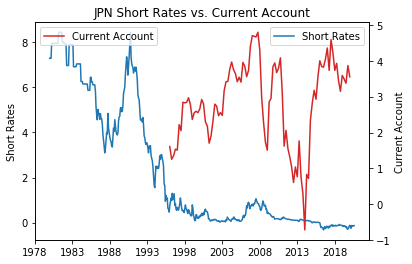

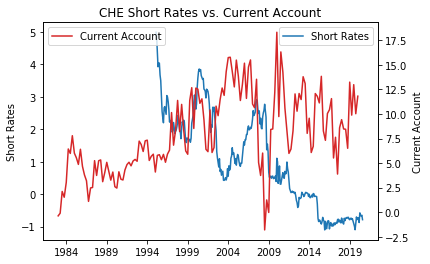

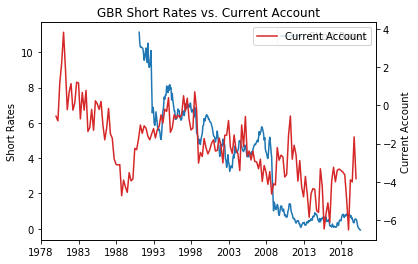

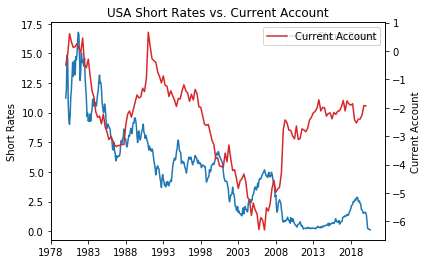

In [181]:
for country in curr_acct_gdp.columns:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1_label = 'Short Rates'
    ax1.plot(ShortRates[country].to_timestamp(), label = ax1_label)
    ax1.set_ylabel(ax1_label)
    ax1.legend()
    ax2_label = 'Current Account'
    ax2.plot(curr_acct_gdp[country].to_timestamp(), color = 'tab:red', label = ax2_label)
    ax2.set_ylabel(ax2_label)
    ax2.legend()
    plt.title(f'{country} Short Rates vs. Current Account')
    plt.show()

#### Example of Short Rates Increase w/ Neg. Current Account

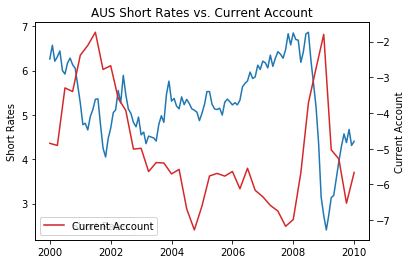

In [180]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'Short Rates'
ax1.plot(ShortRates["AUS"].loc['2000-01-01':'2010-01-01'].to_timestamp(), label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = 'Current Account'
ax2.plot(curr_acct_gdp["AUS"].loc['2000-01-01':'2010-01-01'].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title("AUS Short Rates vs. Current Account")
plt.show()

#### FX vs. Current Account

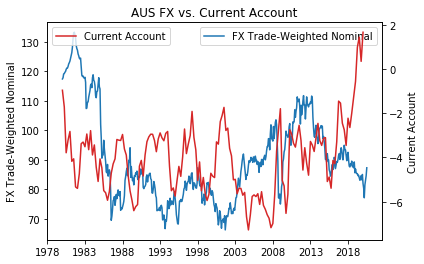

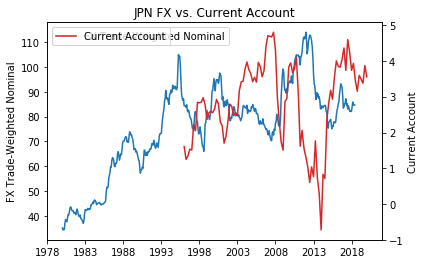

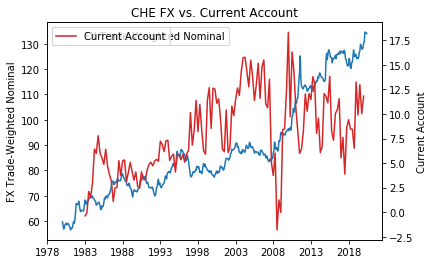

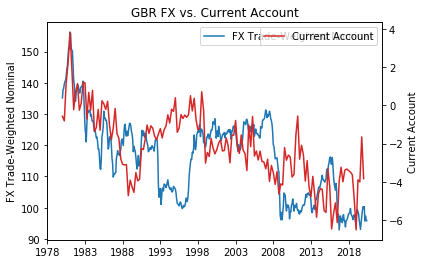

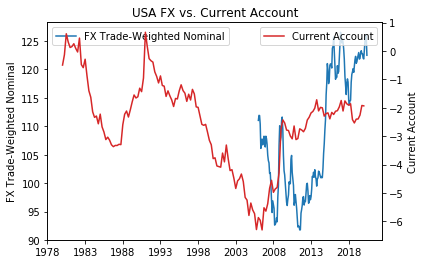

In [184]:
for country in fxNominal.columns:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1_label = 'FX Trade-Weighted Nominal'
    ax1.plot(fxNominal[country].to_timestamp(), label = ax1_label)
    ax1.set_ylabel(ax1_label)
    ax1.legend()
    ax2_label = 'Current Account'
    ax2.plot(curr_acct_gdp[country].to_timestamp(), color = 'tab:red', label = ax2_label)
    ax2.set_ylabel(ax2_label)
    ax2.legend()
    plt.title(f'{country} FX vs. Current Account')
    plt.show()

#### Example of FX Declining with Neg. Current Account

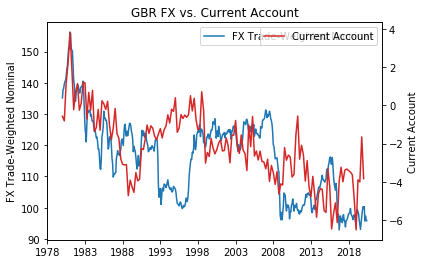

In [187]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'FX Trade-Weighted Nominal'
ax1.plot(fxNominal["GBR"].to_timestamp(), label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = 'Current Account'
ax2.plot(curr_acct_gdp["GBR"].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title('GBR FX vs. Current Account')
plt.show()

#### Counterexample - United States

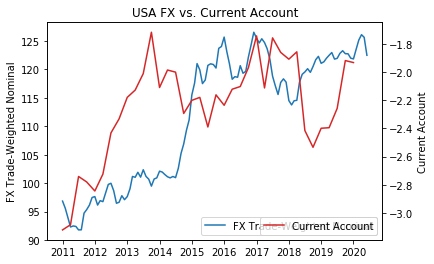

In [194]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'FX Trade-Weighted Nominal'
ax1.plot(fxNominal["USA"].loc['2011-01-01':].to_timestamp(), label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = 'Current Account'
ax2.plot(curr_acct_gdp["USA"].loc['2011-01-01':].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title('USA FX vs. Current Account')
plt.show()

Note: US FX Nominal Trade-Weighted Data is limited - I checked if US exchange rates could be used as a proxy for currency appreciation/depreciation, but since the US Dollar is compared to the Euro, I did not think this would be a meaningful assessment of the currency as a whole.

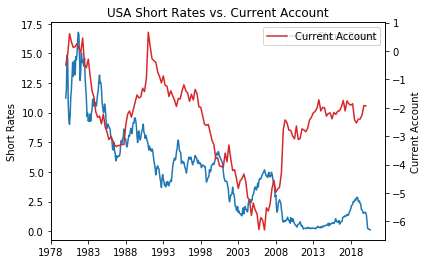

In [196]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'Short Rates'
ax1.plot(ShortRates["USA"].to_timestamp(), label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = 'Current Account'
ax2.plot(curr_acct_gdp["USA"].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title("USA Short Rates vs. Current Account")
plt.show()

## Question 7

#### Economic Growth as a Proxy for Opportunity Cost
Logic: As an economy grows, equities will have a higher rate of return. Therefore, bonds will have to offer a higher yield to compensate for the opportunity cost. Hence, we can look at high economic growth as a proxy for increasing opportunity cost to invest in bonds.

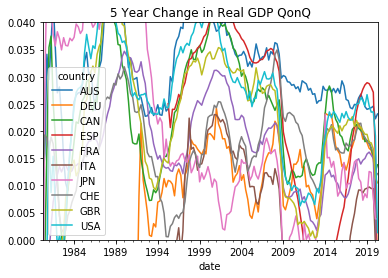

In [213]:
RGDPChangeQoQ_Unannualized = gdp_real.pct_change(1, fill_method = None).dropna(how='all')
RGDPChangeQoQ = (RGDPChangeQoQ_Unannualized + 1) ** 4 - 1
rgdp_change_5yr = RGDPChangeQoQ.rolling(4*5, min_periods = 1).mean()
rgdp_change_5yr.plot()
plt.title("5 Year Change in Real GDP QonQ")
plt.ylim(0.00,0.04)
plt.show()

#### Inflation Expectations

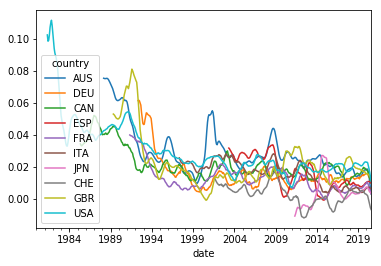

In [211]:
core_cpi_change = core_cpi.pct_change(12)
rolling_cpi_change = core_cpi_change.rolling(5).mean()
rolling_cpi_change.plot()
plt.show()

In [226]:
annual_bond_returns = BondReturnIdx.pct_change(WEEKDAYS_IN_YEAR)

#### Example: Australia

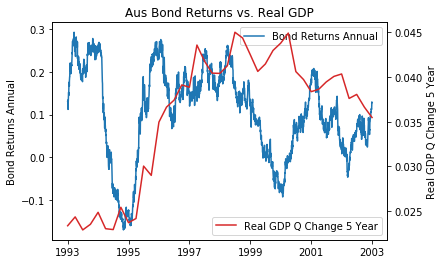

In [221]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'Bond Returns Annual'
ax1.plot(annual_bond_returns["AUS"].loc['1993-01-01':'2003-01-01'].to_timestamp(), label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = 'Real GDP Q Change 5 Year'
ax2.plot(rgdp_change_5yr["AUS"].loc['1993-01-01':'2003-01-01'].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title("Aus Bond Returns vs. Real GDP")
plt.show()

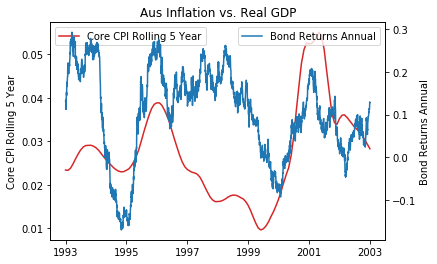

In [236]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'Core CPI Rolling 5 Year'
ax1.plot(rolling_cpi_change["AUS"].loc['1993-01-01':'2003-01-01'].to_timestamp(), color = 'tab:red', label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = 'Bond Returns Annual'
ax2.plot(annual_bond_returns["AUS"].loc['1993-01-01':'2003-01-01'].to_timestamp(), label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title("Aus Inflation vs. Real GDP")
plt.show()

#### Example: Spain

NameError: name 'annual_bond_returns' is not defined

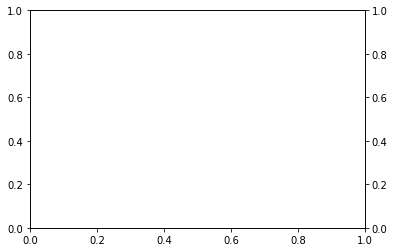

In [4]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'Bond Returns Annual'
ax1.plot(annual_bond_returns["USA"].to_timestamp(), label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = 'Real GDP Q Change 5 Year'
ax2.plot(rgdp_change_5yr["USA"].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title("USA Bond Returns vs. Real GDP")
plt.show()

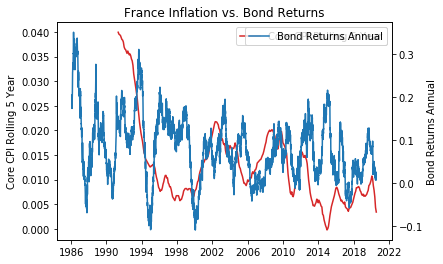

In [273]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'Core CPI Rolling 5 Year'
ax1.plot(rolling_cpi_change["FRA"].to_timestamp(), color = 'tab:red', label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = 'Bond Returns Annual'
ax2.plot(annual_bond_returns["FRA"].to_timestamp(), label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend()
plt.title("France Inflation vs. Bond Returns")
plt.show()

Is there a good way of calculating a correlation? We could smooth the real GDP to see clearer correlations, but since there are 2 forces at play here (inflation and real gdp), correlation does not really summarize the holistic effect of both factors. Would it make more sense to combine the two indicators and then calculate a correlation?

## Question 8

With appreciating currency, we expect imports to be relatively cheaper. As imports increase, there is a lower aggregate price level and less inflation. This allows the fed to lower interest rates without worry of inflation. This would suggest that bond returns increase as currency appreciates.

- Does appreciating currency --> Decreases in current account? (increased imports)
- Does appreciating currency --> Less inflation?
- Does appreciating currency --> Lower interest rates?

#### Appreciating currency --> Increase in imports? (Decrease in current account)

In [298]:
fxReal_rolling_mean = fxNominal.rolling(12).mean()
curr_acct_rolling_mean = curr_acct_gdp.rolling(4).mean()

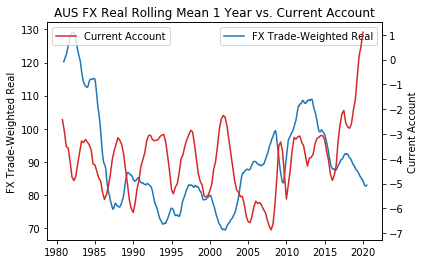

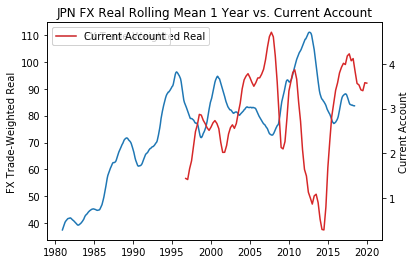

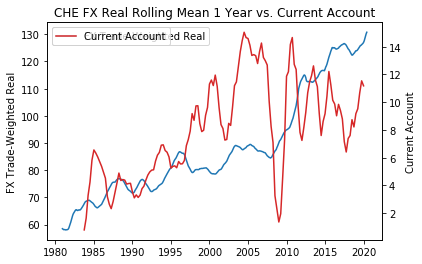

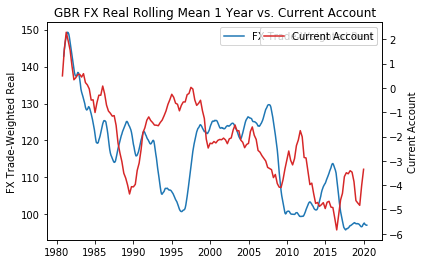

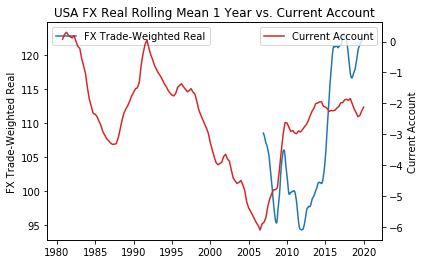

In [299]:
for country in fxReal.columns:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1_label = 'FX Trade-Weighted Real'
    ax1.plot(fxReal_rolling_mean[country].to_timestamp(), label = ax1_label)
    ax1.set_ylabel(ax1_label)
    ax1.legend()
    ax2_label = 'Current Account'
    ax2.plot(curr_acct_rolling_mean[country].to_timestamp(), color = 'tab:red', label = ax2_label)
    ax2.set_ylabel(ax2_label)
    ax2.legend()
    plt.title(f'{country} FX Real Rolling Mean 1 Year vs. Current Account')
    plt.show()

#### Appreciating Currency --> Inflation

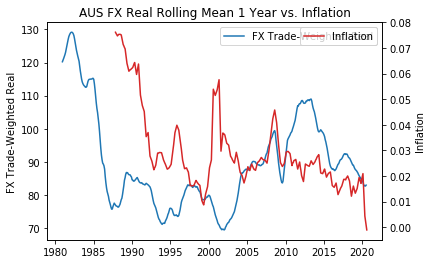

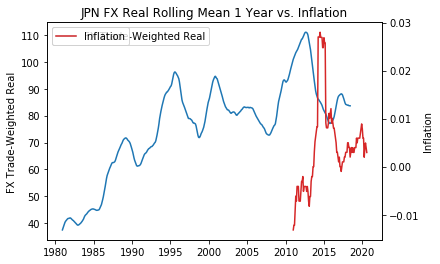

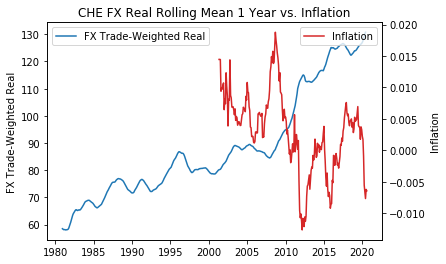

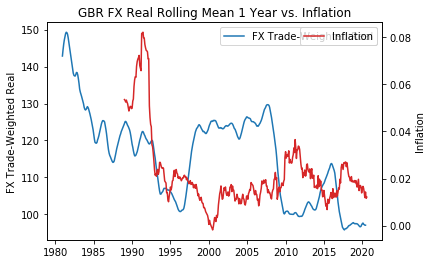

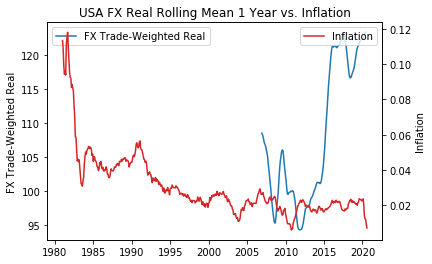

In [303]:
inf_change = core_cpi.pct_change(12)

for country in fxReal.columns:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1_label = 'FX Trade-Weighted Real'
    ax1.plot(fxReal_rolling_mean[country].to_timestamp(), label = ax1_label)
    ax1.set_ylabel(ax1_label)
    ax1.legend()
    ax2_label = 'Inflation'
    ax2.plot(inf_change[country].to_timestamp(), color = 'tab:red', label = ax2_label)
    ax2.set_ylabel(ax2_label)
    ax2.legend()
    plt.title(f'{country} FX Real Rolling Mean 1 Year vs. Inflation')
    plt.show()

The FX --> inflation trend appears to be visible in CHE, AUS (post 2000), GBR (post 1995).  

#### Appreciating Currency --> Interest Rates

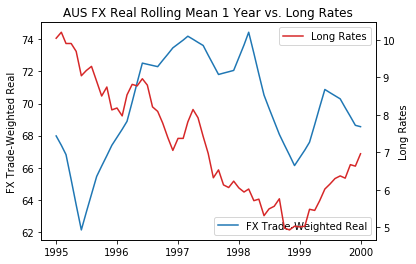

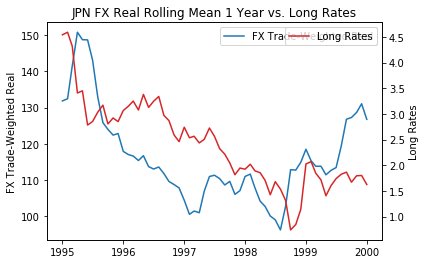

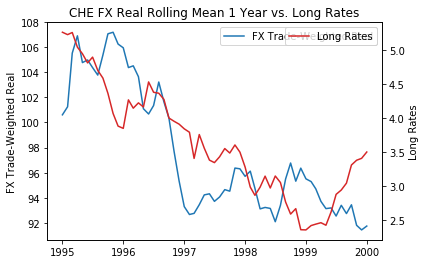

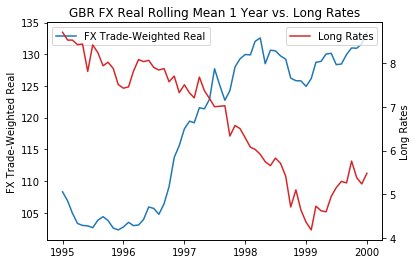

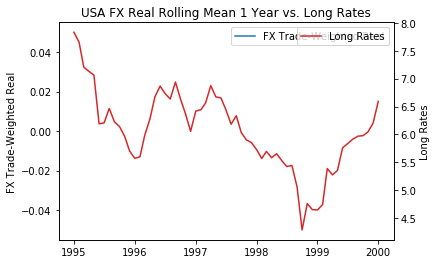

In [306]:
for country in fxReal.columns:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1_label = 'FX Trade-Weighted Real'
    ax1.plot(fxReal[country].loc['1995-01-01':'2000-01-01'].to_timestamp(), label = ax1_label)
    ax1.set_ylabel(ax1_label)
    ax1.legend()
    ax2_label = 'Long Rates'
    ax2.plot(LongRates[country].loc['1995-01-01':'2000-01-01'].to_timestamp(), color = 'tab:red', label = ax2_label)
    ax2.set_ylabel(ax2_label)
    ax2.legend()
    plt.title(f'{country} FX Real Rolling Mean 1 Year vs. Long Rates')
    plt.show()

##### Appreciating Currency --> Bond Returns

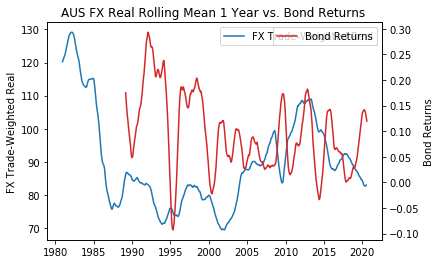

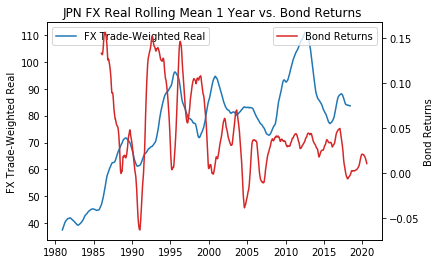

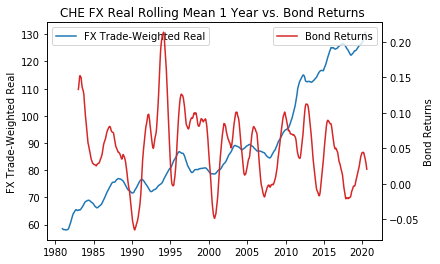

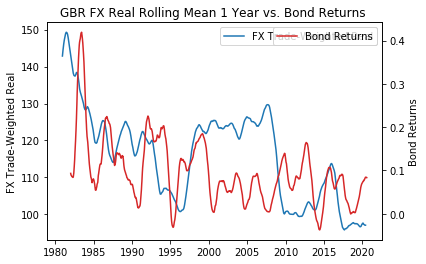

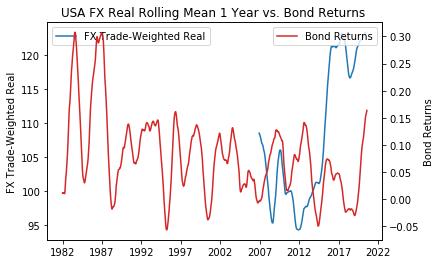

In [308]:
for country in fxReal.columns:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1_label = 'FX Trade-Weighted Real'
    ax1.plot(fxReal_rolling_mean[country].to_timestamp(), label = ax1_label)
    ax1.set_ylabel(ax1_label)
    ax1.legend()
    ax2_label = 'Bond Returns'
    ax2.plot(annual_bond_returns[country].rolling(261).mean().to_timestamp(), color = 'tab:red', label = ax2_label)
    ax2.set_ylabel(ax2_label)
    ax2.legend()
    plt.title(f'{country} FX Real Rolling Mean 1 Year vs. Bond Returns ')
    plt.show()

It appears that bond returns are more of a reaction to short term movements, rather than sustained long-term returns from a steady increase in FX. >> Pay attention to the percent change of FX over a short period of time.

/Users/raynakanapuram/.local/share/virtualenvs/Intership2020-RvVaDbFg/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


NameError: name 'normalized_change_m2' is not defined

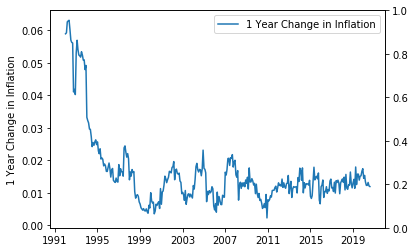

In [5]:
# Is there a lag between increases in money supply & inflation?
#Intuitively, there is a lag between when money enters the economy & when it is spent and causes inflation.
change_inflation = core_cpi.pct_change(12)

for country in m2.columns:
    #Bond Premium
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1_label = '1 Year Change in Inflation'
    ax1.plot(change_inflation[country].to_timestamp(), label = ax1_label)
    ax1.set_ylabel(ax1_label)
    ax1.legend()
    ax2_label = '2 Year Change in M2'
    ax2.plot(normalized_change_m2[country].to_timestamp(), color = 'tab:red', label = ax2_label)
    ax2.set_ylabel(ax2_label)
    ax2.legend()
    plt.title(country + " Change M2 vs. Inflation")
    plt.show()

NameError: name 'change_m2' is not defined

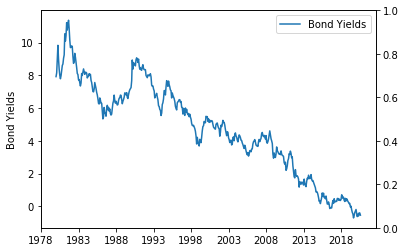

In [6]:

for country in m2.columns:
    #Bond Premium
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1_label = 'Bond Yields'
    ax1.plot(LongRates[country].to_timestamp(), label = ax1_label)
    ax1.set_ylabel(ax1_label)
    ax1.legend()
    ax2_label = '1 Year Change in M2'
    ax2.plot(change_m2[country].to_timestamp(), color = 'tab:red', label = ax2_label)
    ax2.set_ylabel(ax2_label)
    ax2.legend()
    plt.title(country + " Change M2 vs. Bond Yields")
    plt.show()